# Diabetes Prediction
## What is Diabetes?
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. 

- The objective is to classify whether someone has diabetes or not.

## About the Dataset

- Pregnancies :- Number of times a woman has been pregnant
- Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
- BloodPressure :- Diastollic Blood Pressure (mm hg)
- SkinThickness :- Triceps skin fold thickness(mm)
- Insulin :- 2 hour serum insulin(mu U/ml)
- BMI :- Body Mass Index ((weight in kg/height in m)^2)
- Age :- Age(years)
- DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history) 
- Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

# INDEX :- 
**1. Importing Required Libraries**

**2. Loading the Dataset**

**3. Exploratory Data Analysis**

a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value
         
**4. Data Visualization**
####  Here we are going to plot :-
 - Count Plot :- to see if the dataset is balanced or not
 - Histograms :- to see if data is normally distributed or skewed
 - Box Plot :- to analyse the distribution and see the outliers
 - Scatter plots :- to understand relationship between any two variables
 - Pair plot :- to create scatter plot between all the variables
 
**5. Feature Selection**

**6. Handling Outliers**

**7. Split the Data Frame into X and y**

**8. PCA**

**9. Build the Classification Algorithm**

9.1  KNN

9.2  KNN Centroid

9.3  KNN (self implemented, k = 3 , euclidan distance) 

9.4  Soft Sets

9.5  Fuzzy Sets


#### The models include the following:- 

  a. Hyper Parameter Tuning using GridSearch CV 
  
  b. Fit Best Model
  
  c. Predict on testing data using that model
  
  d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score

**10. Conclusion**

**11. Generate PDF doc from the .ipnyb**

# 1. Import Required Libraries

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 31.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=edb4edefc4c9078d7aced97821a27488e86a87da84c7410e63c2daa0c2bf61c6
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [254]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')




# 2. Loading the dataset 

In [ ]:
df=pd.read_csv("/content/diabetes.csv")

# 3. Exploratory Data Analysis
## a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [ ]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [ ]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe() #helps us to understand how data has been spread across the table.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **CONCLUSION** :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

## b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.


In [ ]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [ ]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


### NOTE :-
Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

Refer Histograms down below to see the distribution.




In [ ]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# 4. Data Visualization
## Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

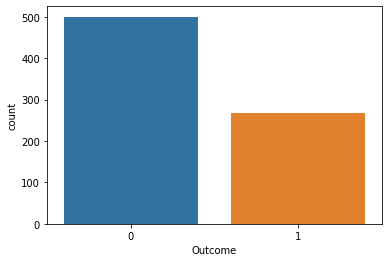

In [ ]:
sns.countplot('Outcome',data=df)

### **Conclusion** :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

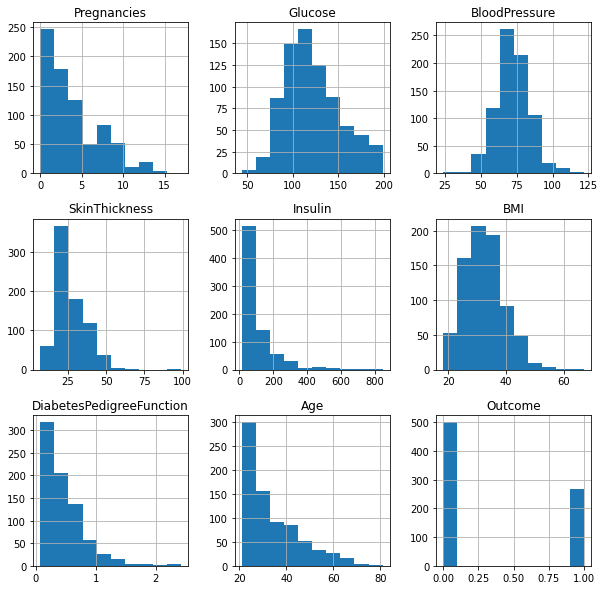

In [ ]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### **Conclusion** :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

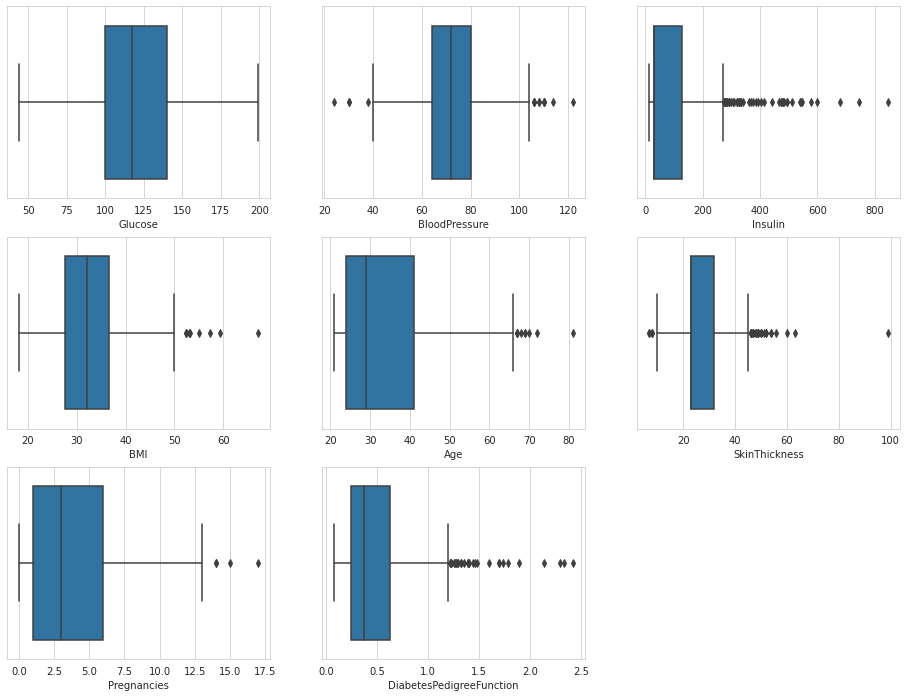

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

# 5. Feature Selection

**Pearson's Correlation Coefficient** : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

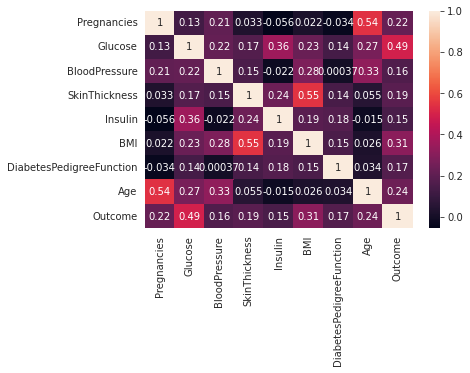

In [ ]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

### **CONCLUSION** :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them. 

In [ ]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

# 6. Handling Outliers 

**1 — What is an Outlier?**

An outlier is a data point in a data set that is distant from all other observations.

I've used Box Plots above in data visualization step to detect outliers.

**2 — How am I treating the outliers ?**

Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme. 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


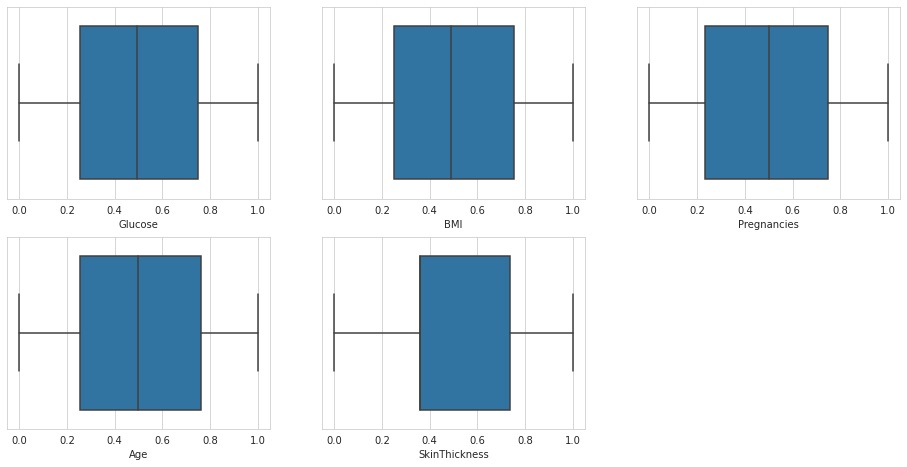

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# 7. Split the Data Frame into X and y

In [ ]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [ ]:
X.head() # contains only independent features 

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [ ]:
y.head() #contains dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

## 7.1 Train test split

I've used 80% train and 20% test



In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [93]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [94]:
X_test.shape,y_test.shape

((154, 5), (154,))

# 8. PCA

## PCA Algorithm for compression
PCA analysis is used to select axes of the train data set that keep the highest variance in the train set. Number of axes is equal to the count of dimensions in the data.

After reducing number of dimensions train set takes much less space in computer memory. It can speed up work of algorithms, while keeping high variation of train set (here it's 95%). We can see on the plot, that because of having only 5 components in the data-set PCA dropping 1 component would leave us with 92% variance in train set, so we end up dropping 0 components.

For bigger data sets it's advised to batch-load the data to avoid overflowing the memory.

[0.37646651 0.67602246 0.84234303 0.92566814 1.        ]


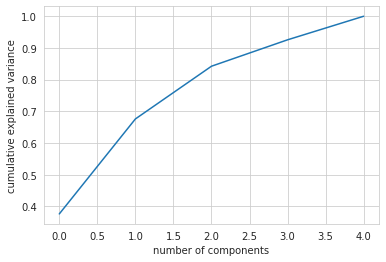

In [95]:
from sklearn.decomposition import PCA
print(np.cumsum(pca.explained_variance_ratio_))
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


pca = PCA(n_components = 0.95)
X_train_95 = pca.fit_transform(X_train)



### **CONCLUSION** Too few dimensions available for PCA to bring value, will try it anyway. Doing PCA unfortunetly results in mix of permutated dimensions. We can no longer tell what is what, as the dimensions that are left are a permutation made out from all the dimensions in the data.

In [129]:
print(' \tX_train  after PCA  \n')
print(X_train_95)
print('\n \n \t X_train  before PCA \n')
print(X_train)

 	X_train  after PCA  

[[-0.65006245 -0.05446801  0.08196798  0.02580802  0.01860238]
 [ 0.39962336 -0.18841878 -0.19197339 -0.20165945 -0.17424596]
 [ 0.02959     0.81549439  0.34219695  0.00332988 -0.07763099]
 ...
 [ 0.59874395 -0.34362438 -0.13841723 -0.25021501 -0.23514687]
 [-0.07894426 -0.47618066 -0.4416827   0.01881146 -0.1389717 ]
 [-0.42077559 -0.30231941  0.16751394  0.19806597  0.08539584]]

 
 	 X_train  before PCA 

     Pregnancies   Glucose  SkinThickness       BMI       Age
603     0.809648  0.816167       0.644720  0.687744  0.926336
118     0.596480  0.217731       0.357888  0.286180  0.128422
247     0.000000  0.891786       0.768579  0.991525  0.200130
157     0.232725  0.394394       0.167536  0.153846  0.200130
468     0.863755  0.532595       0.357888  0.375489  0.705346
..           ...       ...            ...       ...       ...
763     0.940678  0.278357       0.978488  0.552803  0.976532
192     0.809648  0.866362       0.357888  0.398957  0.659713
629   

# 9. Classification Algorithms

- KNN
- KNN centroid
- KNN (self implemented)**pogrubiony tekst**
- Soft sets system
- Example of fuzzy set system

### The models include the following:-

#### a. Hyper Parameter Tuning using GridSearch CV


#### b. Fit Best Model

#### c. Predict on testing data using that model

#### d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
**Confusion Matrix**
It is a tabular visualization of the model predictions versus the ground-truth labels. 



**F1 Score :-**
It’s the harmonic mean between precision and recall. 



**Precision Score**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.



**Recall Score**
It is the fraction of positives/negative events that you predicted correctly. 




## 9.1 K Nearest Neighbours :-

KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [97]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [98]:
best_model = grid_search.fit(X_train,y_train)

In [99]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [100]:
#Predict testing set
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



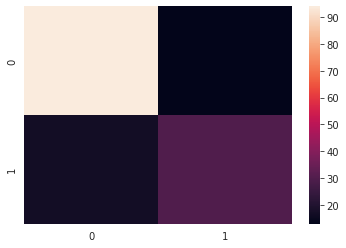

In [101]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.66      0.76      0.71       107
         1.0       0.19      0.13      0.15        47

    accuracy                           0.56       154
   macro avg       0.43      0.44      0.43       154
weighted avg       0.52      0.56      0.54       154


 F1:
 0.1518987341772152

 Precision score is:
 0.1875

 Recall score is:
 0.1276595744680851

 Confusion Matrix:



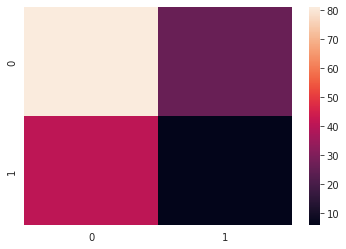

In [116]:
best_model_95 = grid_search.fit(X_train_95,y_train)
knn_pred = best_model_95.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

## 9.2  Nearest Centroid :-

The NearestCentroid classifier is a simple algorithm that represents each class by the centroid of its members. In effect, this makes it similar to the label updating phase of the KMeans algorithm. It also has no parameters to choose, making it a good baseline classifier.

In [200]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [201]:
#List Hyperparameters to tune
ncentroid= NearestCentroid()

shrink_threshold=[None,0.0000000000000000000001,0.001,0.1,1.0,5.0,50]
metric = ['euclidean', 'manhattan']

#convert to dictionary
hyperparameters = dict(shrink_threshold=shrink_threshold,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ncentroid, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [202]:
best_ncentroid_model = grid_search.fit(X_train,y_train)
print('Best shrink_threshold:', best_ncentroid_model.best_estimator_.get_params()['shrink_threshold'])
print('Best metric:', best_ncentroid_model.best_estimator_.get_params()['metric'])

Best shrink_threshold: None
Best metric: euclidean


In [203]:
#Predict testing set
cn_pred = best_ncentroid_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.88      0.74      0.80       107
         1.0       0.56      0.77      0.65        47

    accuracy                           0.75       154
   macro avg       0.72      0.75      0.73       154
weighted avg       0.78      0.75      0.76       154


 F1:
 0.6486486486486486

 Precision score is:
 0.5625

 Recall score is:
 0.7659574468085106

 Confusion Matrix:



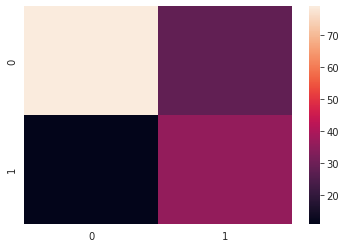

In [204]:
print("Classification Report is:\n",classification_report(y_test,cn_pred))
print("\n F1:\n",f1_score(y_test,cn_pred))
print("\n Precision score is:\n",precision_score(y_test,cn_pred))
print("\n Recall score is:\n",recall_score(y_test,cn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,cn_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.66      0.76      0.71       107
         1.0       0.19      0.13      0.15        47

    accuracy                           0.56       154
   macro avg       0.43      0.44      0.43       154
weighted avg       0.52      0.56      0.54       154


 F1:
 0.1518987341772152

 Precision score is:
 0.1875

 Recall score is:
 0.1276595744680851

 Confusion Matrix:



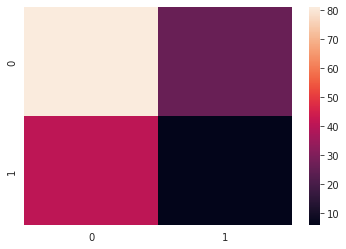

In [205]:
best_ncentroid_model_95 = grid_search.fit(X_train_95,y_train)
cn_pred = best_ncentroid_model_95.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,cn_pred))
print("\n F1:\n",f1_score(y_test,cn_pred))
print("\n Precision score is:\n",precision_score(y_test,cn_pred))
print("\n Recall score is:\n",recall_score(y_test,cn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,cn_pred))

## 9.3 K-NN (Self-Implemented, k =3, Eucilidan distance) :-



In [249]:
import numpy as np

from numpy.linalg import norm

def euclidean(a, b):
    """Compute and return the euclidean distance between a and b."""
    return norm(a-b)

class KNearestNeighbors:

    def __init__(self, k=19, distance_metric=euclidean):
        """Initialize k value and distance metric used for model."""
        self.k = k
        self.distance = distance_metric
        self.data = None

    def train(self, X, y):
        """Zip labels and input data together for classification."""
        # raise value error if inputs are wrong length or different types
        if len(X) != len(y) or type(X) != type(y):
            raise ValueError("X and y are incompatible.")
        # convert ndarrays to lists
        if type(X) == np.ndarray:
            X, y = X.tolist(), y.tolist()
        # set data attribute containing instances and labels
        self.data = [X[i]+[y[i]] for i in range(len(X))]

    def predict(self, a):
        """Predict class based on k-nearest neighbors."""
        neighbors = []
        # create mapping from distance to instance
        distances = {self.distance(x[:-1], a): x for x in self.data}
        # collect classes of k instances with shortest distance
        for key in sorted(distances.keys())[:self.k]:
            neighbors.append(distances[key][-1])
        # return most common vote
        return max(set(neighbors), key=neighbors.count)

In [250]:
knn_custom = KNearestNeighbors()
knn_custom.train(X_train.to_numpy(),y_train.to_numpy())
knn_custom
knn_custom_pred = []
for point in X_test.to_numpy():
  knn_custom_pred.append(knn_custom.predict(point))


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       107
         1.0       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154


 F1:
 0.651685393258427

 Precision score is:
 0.6904761904761905

 Recall score is:
 0.6170212765957447

 Confusion Matrix:



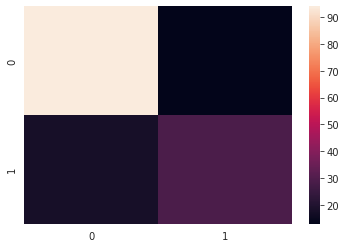

In [251]:


print("Classification Report is:\n",classification_report(y_test,knn_custom_pred))
print("\n F1:\n",f1_score(y_test,knn_custom_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_custom_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_custom_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_custom_pred))

In [252]:
knn_custom = KNearestNeighbors()
knn_custom.train(X_train_95,y_train.to_numpy())
knn_custom
knn_custom_pred = []
for point in X_test.to_numpy():
  knn_custom_pred.append(knn_custom.predict(point))


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.66      0.76      0.71       107
         1.0       0.19      0.13      0.15        47

    accuracy                           0.56       154
   macro avg       0.43      0.44      0.43       154
weighted avg       0.52      0.56      0.54       154


 F1:
 0.1518987341772152

 Precision score is:
 0.1875

 Recall score is:
 0.1276595744680851

 Confusion Matrix:



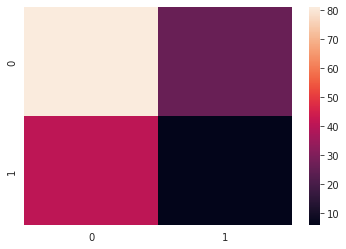

In [253]:
model = knn_custom.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,cn_pred))
print("\n F1:\n",f1_score(y_test,cn_pred))
print("\n Precision score is:\n",precision_score(y_test,cn_pred))
print("\n Recall score is:\n",recall_score(y_test,cn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,cn_pred))

## 9.3 Soft Sets :-

It's a set of rules based on expert knowledge, it uses 'crisp' logic.

It requires expert knowledge to produce a set of rules used for scoring. Here we will just select most distinctive value and use it as an example, system should be underperforming.

In [107]:
df_selected.loc[df_selected['Outcome'] == 0].describe()  

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.705367,26.058000,30.880200,31.190000,0.0
std,3.017185,24.715021,8.725532,6.503074,11.667655,0.0
min,0.000000,44.000000,7.000000,18.200000,21.000000,0.0
25%,1.000000,93.000000,22.000000,25.750000,23.000000,0.0
50%,2.000000,107.500000,23.000000,30.400000,27.000000,0.0
75%,5.000000,125.000000,31.000000,35.300000,37.000000,0.0
max,13.000000,197.000000,60.000000,57.300000,81.000000,0.0


In [108]:
df_selected.loc[df_selected['Outcome'] == 1].describe()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.159661,29.716418,35.381343,37.067164,1.0
std,3.741239,29.545943,9.676886,6.596704,10.968254,0.0
min,0.000000,78.000000,7.000000,22.900000,21.000000,1.0
25%,1.750000,119.000000,23.000000,30.900000,28.000000,1.0
50%,4.000000,140.000000,27.000000,34.250000,36.000000,1.0
75%,8.000000,167.000000,36.000000,38.775000,44.000000,1.0
max,17.000000,199.000000,99.000000,67.100000,70.000000,1.0


In [109]:
df_selected['Outcome_predicted'] = None
df_selected.loc[df_selected['Glucose'] >= 125, 'Outcome_predicted'] = 1
df_selected.loc[df_selected['Glucose'] < 125, 'Outcome_predicted'] = 0
y_actual = df_selected['Outcome'].to_list()
soft_predicted = df_selected['Outcome_predicted'].to_list()

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.74      0.78       500
           1       0.59      0.68      0.63       268

    accuracy                           0.72       768
   macro avg       0.70      0.71      0.70       768
weighted avg       0.74      0.72      0.73       768


 F1:
 0.6321243523316062

 Precision score is:
 0.5884244372990354

 Recall score is:
 0.6828358208955224

 Confusion Matrix:



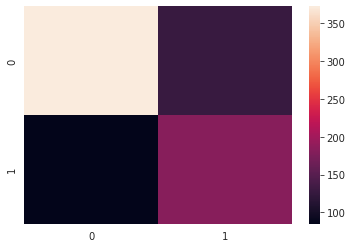

In [110]:
from sklearn.metrics import classification_report
print("Classification Report is:\n",classification_report(y_actual,soft_predicted))
print("\n F1:\n",f1_score(y_actual,soft_predicted))
print("\n Precision score is:\n",precision_score(y_actual,soft_predicted))
print("\n Recall score is:\n",recall_score(y_actual,soft_predicted))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_actual,soft_predicted))

## 9.4 Fuzzy Sets

Soft sets can be fuzzified, using "fuzzy logic" instead of crisp, it requries much more expert knowledge to create a set of rules for all scenarios so results can be defuzzifed. Below is just basic example of how such set of rules could have been built and used.



In [111]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
Glucose = ctrl.Antecedent(df_selected['Glucose'], 'Glucose')
Outcome = ctrl.Consequent(df_selected['Outcome'], 'Outcome')

# Auto-membership function population is possible with .automf(3, 5, or 7)
Glucose.automf(3)
Outcome.automf(3)

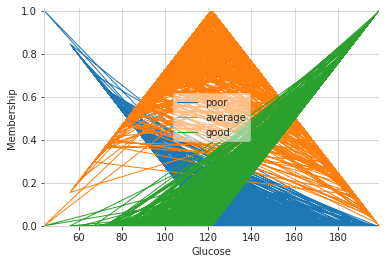

In [112]:
Glucose.view()

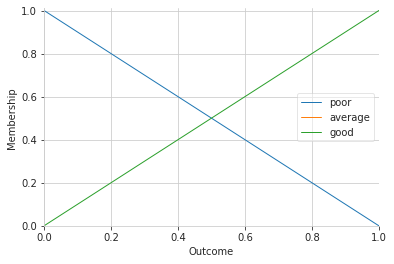

In [113]:
# You can see how these look with .view()
Outcome.view() # Output is binary.

### NOT ENOUGH RULES, SHOULD COVER EVERY SCENARIO WITH DATA

In [114]:
# Expert knowledge that i don't have should be used here.
rule1 = ctrl.Rule(Glucose['poor'],Outcome['poor'])
rule2 = ctrl.Rule(Glucose['average'],Outcome['average'])
rule3 = ctrl.Rule(Glucose['good'],Outcome['good'],)



fuzzy = ctrl.ControlSystem([rule1,rule2,rule3])
fuzzySimulation = ctrl.ControlSystemSimulation(fuzzy)


In [115]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
for value in df['Glucose']:
    fuzzySimulation.input['Glucose'] = value
#     fuzzySimulation.compute()


# 10. Conclusion

For this type of problem, the best results is to use ML algorithms and techniques that do not require expert knowledge from well tested and documated sources such as popular sci-kit. It performed the best.

# 11. Generate PDF documentation from the .ipnyb

In [263]:

!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('diabetes-prediction-project.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/diabetes-prediction-project.ipynb to pdf
[NbConvertApp] Support files will be in diabetes-prediction-project_files/
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbConvertApp] Making directory ./diabetes-prediction-project_files
[NbCon

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'